PROJECT 2. Static&Interactive Data Visualization

# Static Data Visualization (pandas + .plot)

## Dataset adaptation


In [3]:
import pandas as pd

In [4]:
df_population_raw = pd.read_csv('population_total.csv')
df_population_raw

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


### Method pivot() 
para reorganizar dataset. Index=años Columns=paises

In [5]:
# elimnar valores nulos
df_population_raw.dropna(inplace=True)
df_population_raw


,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [6]:
# la columna year colocarla en Index, country será la columna, y population los valores del dataframe
# hacemos pivot table

df_pivot = df_population_raw.pivot(index="year", columns="country", values="population")



In [7]:
# seleccionar algunos paises
df_pivot = df_pivot[['United States', 'India', 'China', 'Indonesia', 'Brazil']]
df_pivot

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


## Data visualization

## Lineplot

<AxesSubplot:title={'center':'Population (1955-2020)'}, xlabel='Years', ylabel='Population'>

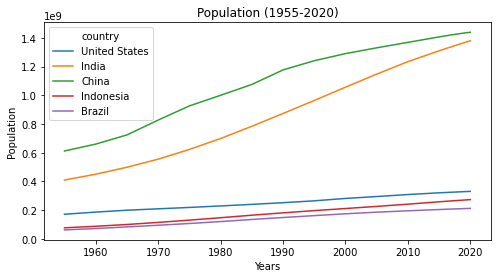

In [8]:
df_pivot.plot(kind='line', xlabel='Years', ylabel='Population', 
             title='Population (1955-2020)', figsize=(8,4))

## Barplot

### Barplot separated

In [18]:
# seleccionamos solo un año (2020)
df_pivot.index

Float64Index([1955.0, 1960.0, 1965.0, 1970.0, 1975.0, 1980.0, 1985.0, 1990.0,
              1995.0, 2000.0, 2005.0, 2010.0, 2015.0, 2016.0, 2017.0, 2018.0,
              2019.0, 2020.0],
             dtype='float64', name='year')

In [21]:
df_pivot_2020 = df_pivot[df_pivot.index.isin([2020])]
df_pivot_2020

country,United States,India,China,Indonesia,Brazil
year,,,,,
2020.0,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


In [26]:
# transponer el dataframe (cambiando filas con columnas y viceversa) usamo el metodo .T
df_pivot_2020 = df_pivot_2020.T
df_pivot_2020

year,2020.0
country,
United States,3.310027e+08
India,1.380004e+09
China,1.439324e+09
Indonesia,2.735236e+08
Brazil,2.125594e+08


<AxesSubplot:xlabel='country'>

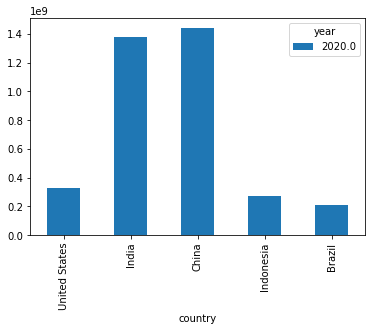

In [29]:
# hacer el barplot
df_pivot_2020.plot(kind='bar')

<AxesSubplot:title={'center':'Population in 2020'}, xlabel='Years', ylabel='Population'>

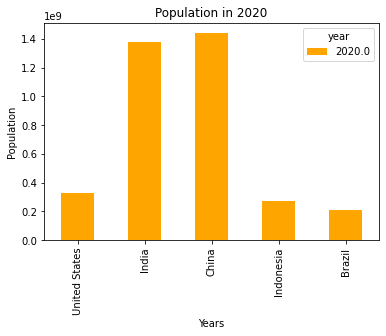

In [30]:
df_pivot_2020.plot(kind='bar', color='orange', xlabel='Years', ylabel='Population',
                  title='Population in 2020')

### Barplot grouped by n variable

In [31]:
# seleccionar unos años
df_pivot_sample = df_pivot[df_pivot.index.isin([1980, 1990, 2000, 2010, 2020])]

<AxesSubplot:xlabel='Years', ylabel='Population'>

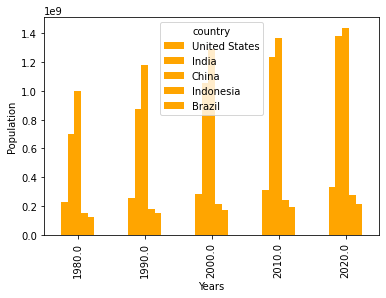

In [34]:
# haciendo barplot agrupado
df_pivot_sample.plot(kind='bar', color='orange', xlabel='Years', ylabel='Population')

## Piechart

In [38]:
# cambiamos el nombre de columna porque en este caso el nombre de la columna es un 'float64'
# y esto es una mala práctica y debemos sustituirlo por cadena de texto 'str' usando "rename"

df_pivot_2020.rename(columns={2020:'2020'}, inplace=True)
df_pivot_2020

year,2020
country,
United States,3.310027e+08
India,1.380004e+09
China,1.439324e+09
Indonesia,2.735236e+08
Brazil,2.125594e+08


<AxesSubplot:title={'center':'Population in 2020 (%)'}, ylabel='2020'>

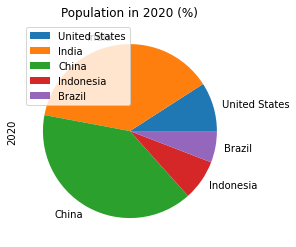

In [42]:
# hacemos el piechart
df_pivot_2020.plot(kind='pie', y='2020', title='Population in 2020 (%)')

## Boxplot
Los datos se representan en cajas.
Podemos visualizar los datos y su distribución.
Se visualizan 5 valores:
La media, el primer cuartil Q1, la mediana, tercer quartil Q3, el valor maximo.

### single Boxplot

In [43]:
df_pivot

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


<AxesSubplot:>

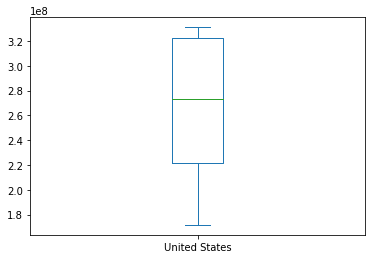

In [45]:
df_pivot['United States'].plot(kind='box')

<AxesSubplot:ylabel='population'>

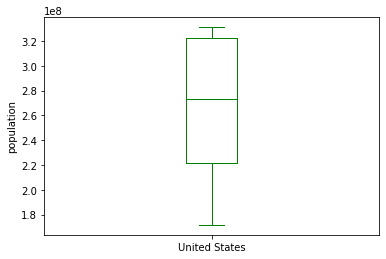

In [46]:
# ahora cambiamos algunos argumentos
df_pivot['United States'].plot(kind='box', color='green',
                              ylabel='population')

### Multiple boxplots

<AxesSubplot:ylabel='Population'>

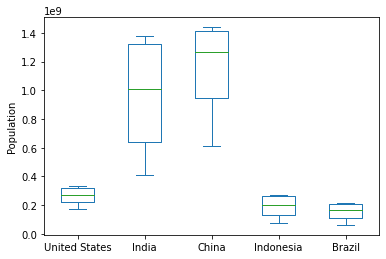

In [48]:
df_pivot.plot(kind='box', xlabel='Countries', ylabel='Population')

## Histogram

In [49]:
df_pivot

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


<AxesSubplot:ylabel='Frequency'>

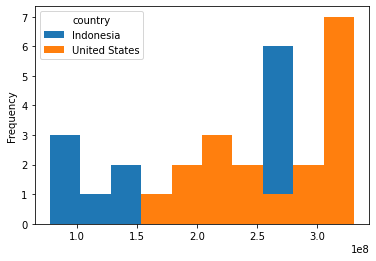

In [53]:
# escogemos el pais China
df_pivot[['Indonesia', 'United States']].plot(kind='hist')

## Scatterplot

In [57]:
# seleccionar una muestra de los datos
df_sample = df_population_raw[df_population_raw['country'].isin(['United States', 'India', 'China', 'Indonesia', 'Brazil'])]

<AxesSubplot:xlabel='year', ylabel='population'>

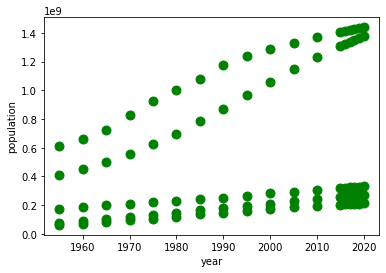

In [61]:
# haciendo el plot
df_sample.plot(kind='scatter', 
              x='year', y='population',
              s=80,
              color='green')
# una desventaja de graficos estaticos con pandas es que no puede asignarse un color para cada pais.
# otra desventaja es que no se puede saber con exactitud la población en cada año, ya que los puntos no aportan información sobre el plot
# estos problemas se solucionan realizando graficos interactivos.

## Save plot and export table

In [1]:
import matplotlib.pyplot as plt

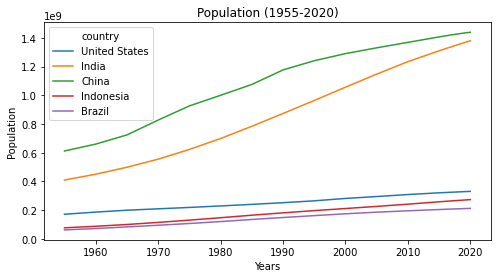

In [21]:
df_pivot.plot(kind='line', xlabel='Years', ylabel='Population', 
             title='Population (1955-2020)', figsize=(8,4))

# save figure
plt.savefig('my_test.png', dpi=100)
# mostrar plot eliminando las palabras en la parte superior cuando se muestra el gráfico
plt.show()


In [22]:
# ahora vamos a exportar a excel la pivot table creada anteriormente
df_pivot.to_excel('Tabla_pivot.xlsx')

 # Interactive Data Visualization (pandas + plotly)

## pip install

In [24]:
!pip install plotly
!pip install cufflinks 
# intermediario entre platly y pansas que permite graficos interactivos

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68736 sha256=afc3b75aabdc12d12d7fe2aace6a0638ca501fc0f4b7e45b7ed41a933ca59b91
  Stored in directory: c:\users\jrver\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


## import & cf.set_config (Theme)

In [26]:
import pandas as pd
import cufflinks as cf
from IPython.display import display,HTML

# configuración haciendolo que sea publico y el color del tema
# para ver todos los temas disponibles: cf.getThemes()

cf.set_config_file(sharing='public', theme='white', offline=True)

In [27]:
# para ver todos los temas disponibles: cf.getThemes()
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

## Reading Dataset

In [132]:
pd.read_csv('population_total.csv')
# observamos que este dataframe tiene 3 columnas y 4185 filas
# debemos limpiar los datos y reordenar el dataframe para poder visualizarlo correctamente

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [133]:
df_population = pd.read_csv('population_total.csv')
# eliminar valores nulos
df_population = df_population.dropna()

df_population = df_population.pivot(index='year',
                    columns='country',
                    values='population')
df_population = df_population[['United States', 'India', 'China', 'Indonesia', 'Brazil']]
df_population

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


## Creating Interactive Plots

### Lineplot

In [46]:
# La siguiente función disponemos de ellas gracias al paquete cufflinks
df_population.iplot(kind='line', xTitle='Year', yTitle='Population', 
                   title='Years vs Population')

In [ ]:
# como podemos observar, al desplazar el cursor por la grafica obtenemos una lectura interactiva de los datos.
# esto no es posible con otras librerias como matplotlib o seeborn


### Barplot

In [134]:
# ahora vamos a representar la población del año 2020
# primero creamos un nuevo dataframe para 2020
# cuando utilizamos isin(), el argumento contenido en los parentesis debe ser una lista, por lo que no hay que olvidar los []
df_population_2020 = df_population[df_population.index.isin([2020])]
df_population_2020 = df_population_2020.T
df_population_2020

year,2020.0
country,
United States,3.310027e+08
India,1.380004e+09
China,1.439324e+09
Indonesia,2.735236e+08
Brazil,2.125594e+08


In [94]:
df_population_2020.iplot(kind='bar', xTitle='Countries', yTitle='Population', 
                         title='Population vs Countries in 20202', color= 'red')



#### Multiple Barplot


In [95]:
df_population_sample = df_population[df_population.index.isin([1980,1990,2000,2010,2020])]
df_population_sample

country,United States,India,China,Indonesia,Brazil
year,,,,,
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
2000.0,281710909.0,1.056576e+09,1.290551e+09,211513823.0,174790340.0
2010.0,309011475.0,1.234281e+09,1.368811e+09,241834215.0,195713635.0
2020.0,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


In [113]:

df_population_sample.iplot(kind='bar', xTitle='Countries', yTitle='Population', 
                         title='Population vs Countries')




### Boxplot

In [115]:
df_population['United States', ].iplot(kind='box')

In [116]:
df_population.iplot(kind='box')

### Histograms

In [119]:
df_population[['United States', 'Indonesia']].iplot(kind='hist')

### Piechart

In [135]:
df_population_2020

year,2020.0
country,
United States,3.310027e+08
India,1.380004e+09
China,1.439324e+09
Indonesia,2.735236e+08
Brazil,2.125594e+08


In [136]:
# adaptamos el dataframe para que podamos realizar el Piechart
# para ello ejecutamos el reset.index y obtener todas las variables como columnas
# a su vez, la columna 2020.0 se encuentra como float y lo renombramos a str

df_population_2020 = df_population_2020.reset_index()
df_population_2020 = df_population_2020.rename(columns={2020:'2020'})

In [137]:
df_population_2020

year,country,2020
0,United States,3.310027e+08
1,India,1.380004e+09
2,China,1.439324e+09
3,Indonesia,2.735236e+08
4,Brazil,2.125594e+08


In [138]:
df_population_2020.iplot(kind='pie', labels='country', values='2020')

### Scatterplot

In [139]:
df_population

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


In [142]:
df_population.iplot(kind='scatter', mode='markers', xTitle='Year', yTitle='Population', 
        title='Year vs Population')